In [1]:
import pandas as pd
from tabulate import tabulate
import pickle
from collections import Counter, defaultdict
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE 
from sklearn.svm import LinearSVC
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import tree
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import joblib
from sklearn import metrics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io as sio
from sklearn import preprocessing

In [37]:

# colm = ["Review" , "Love"]
data = pd.read_csv('drive/My Drive/Colab Notebooks/DMG/a4/clustering_data.csv')

data = data.drop(labels= 'id',axis=1)
# print(data.columns)



data = data.apply(preprocessing.LabelEncoder().fit_transform)

for (columnName, columnData) in data.iteritems():
  data[columnName] = data[columnName].astype(int)
  # print(columnName)
  # le = preprocessing.LabelEncoder()
  # le.fit(data[columnName])
  # temp = list(le.classes_)
  # print(temp)


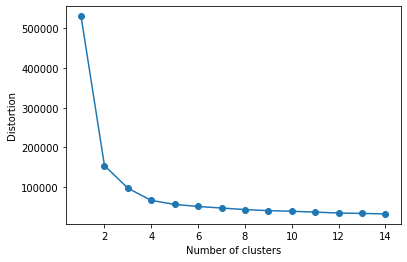

In [62]:
##########################   VISUALIZATION TO find out optimal cluster . . . . . . . ###########################

data = pd.read_csv('drive/My Drive/Colab Notebooks/DMG/a4/clustering_data.csv')

data1 =data
data = data.drop(labels= 'id',axis=1)
# print(data.columns)



data = data.apply(preprocessing.LabelEncoder().fit_transform)

for (columnName, columnData) in data.iteritems():
  data[columnName] = data[columnName].astype(int)
distortions = []
for i in range(1, 15):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=250,
        tol=1e-04, random_state=11
    )
    km.fit(data)
    distortions.append(km.inertia_)


# plot
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

mean = np.mean(data)
std = np.std(data)
# print(mean)
# print(std)
data = (data-mean)/(0.5*std+1e-7)
#################################################


#########################################################   FOR PRODUCING test.csv
km1 = KMeans(
    n_clusters=7, init='k-means++',
    n_init=10, max_iter=250, 
    tol=1e-05, random_state=11
)

# print(len(y_km))

# pca = PCA(n_components=2)
# tsne_df = pca.fit_transform(data)

km1 = km1.fit(tsne_df)
y_km1 = km1.predict(tsne_df)

# df = pd.DataFrame(
#                    'Labels':y_km1
    
# }) 
data1['Labels'] = y_km1
# data1.append(y_km1)
data1.to_csv('result.csv',index=False)

####################################################3   FROM the ABOVE elbow method we conclude that cluster is 4 

In [63]:
data1

,id,Elevation,Aspect,Slope,Wilderness,Soil_Type,Hillshade_9am,Hillshade_noon,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Labels
0,11000,elevation_medium,aspect_high,slope_low,comanche,bullwark_a,hillshade_9am_min,hillnoon_max,0,1,low,0
1,11001,elevation_medium,aspect_medium,slope_medium,comanche,ratake_a,hillshade_9am_max,hillnoon_min,2,1,low,5
2,11002,elevation_medium,aspect_high,slope_medium,comanche,ratake_a,hillshade_9am_min,hillnoon_max,1,1,low,5
3,11003,elevation_medium,aspect_low,slope_ultra,comanche,bullwark_a,hillshade_9am_min,hillnoon_min,1,1,low,0
4,11004,elevation_medium,aspect_high,slope_high,comanche,ratake_a,hillshade_9am_min,hillnoon_max,3,3,low,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4115,15115,elevation_medium,aspect_high,slope_ultra,comanche,ratake_a,hillshade_9am_min,hillnoon_max,4,0,mid,5
4116,15116,elevation_medium,aspect_medium,slope_high,comanche,ratake_a,hillshade_9am_max,hillnoon_min,6,4,mid,1
4117,15117,elevation_medium,aspect_high,slope_ultra,comanche,ratake_a,hillshade_9am_max,hillnoon_min,4,4,mid,1
4118,15118,elevation_medium,aspect_high,slope_ultra,comanche,ratake_a,hillshade_9am_min,hillnoon_max,4,4,low,1


4120
[[ -0.55085953  -0.74063583]
 [  9.40536874   0.30668611]
 [-10.74713911   0.17143439]
 [ 19.28537754  -0.06350517]]


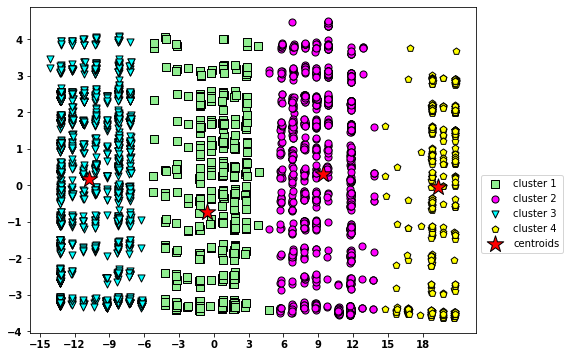

[[-13.1983813   -2.55535   ]
 [ 11.7706716   -1.1947031 ]
 [ 11.79347546  -1.97251026]
 ...
 [ 11.82177613   2.30705991]
 [ 11.82728876   2.29264658]
 [ 18.82022696   1.5918874 ]]


In [14]:


############################################################ KMEANS with centoird for 4 clusters    #####################3

xx = data

km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=250, 
    tol=1e-04, random_state=11
)


pca = PCA(n_components=2)
data = pca.fit_transform(data)
# print(data)
y_km = km.fit_predict(data)
print(len(y_km))

print(km.cluster_centers_)

plt.figure(figsize=(8,6))
plt.scatter(
    data[y_km == 0, 0], data[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)


plt.scatter(
    data[y_km == 1, 0], data[y_km == 1, 1],
    s=50, c='magenta',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    data[y_km == 2, 0], data[y_km == 2, 1],
    s=50, c='cyan',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    data[y_km == 3, 0], data[y_km == 3, 1],
    s=50, c='yellow',
    marker='p', edgecolor='black',
    label='cluster 4'
)

# plt.scatter(
#     data[y_km == 3, 0], data[y_km == 3, 1],
#     s=50, c='purple',
#     marker='o', edgecolor='black',
#     label='cluster 5'
# )

# plt.scatter(
#     data[y_km == 3, 0], data[y_km == 3, 1],
#     s=50, c='cyan',
#     marker='o', edgecolor='black',
#     label='cluster 6'
# )

# plt.scatter(
#     data[y_km == 3, 0], data[y_km == 3, 1],
#     s=50, c='red',
#     marker='o', edgecolor='black',
#     label='cluster 7'
# )

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)





plt.legend(loc='best', bbox_to_anchor=(1, 0.5),scatterpoints=1)
# 
plt.xticks([x for x in range(-15,21,3)],weight='bold')
plt.yticks(weight='bold')
# plt.grid()
plt.show()
print(data)

[[ 1.96234133 -2.81490817]
 [-3.38012978 -0.2438359 ]
 [ 1.95939914  3.51163197]
 [-2.69270703  3.19547824]
 [-2.44225038 -2.73172359]
 [-0.03654496 -0.08932585]
 [ 3.23127833  0.18018128]]


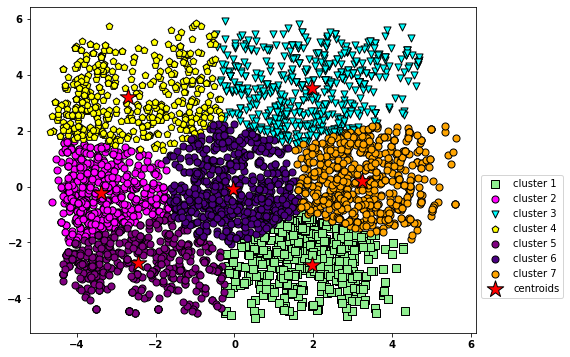

In [49]:





############################################################ KMEANS +++ with centoird for 7 clusters    #####################3


# colm = ["Review" , "Love"]
data = pd.read_csv('drive/My Drive/Colab Notebooks/DMG/a4/clustering_data.csv')

data = data.drop(labels= 'id',axis=1)
# print(data.columns)




data = data.apply(preprocessing.LabelEncoder().fit_transform)

for (columnName, columnData) in data.iteritems():
  data[columnName] = data[columnName].astype(int)


###########  PREPROCESSING ######################
mean = np.mean(data)
std = np.std(data)
# print(mean)
# print(std)
data = (data-mean)/(0.5*std+1e-7)
#################################################

km = KMeans(
    n_clusters=7, init='k-means++',
    n_init=10, max_iter=250, 
    tol=1e-05, random_state=11
)

# print(len(y_km))

pca = PCA(n_components=2)
tsne_df = pca.fit_transform(data)

km = km.fit(tsne_df)
y_km = km.predict(tsne_df)
##########################3  TEMP ###########################


# # sns.FacetGrid(tsne_df, hue ="label", size = 8).map( 
# #         plt.scatter, 'Dim_1', 'Dim_2')
# # plt.legend(loc=4)
# # plt.title("Scattered Plot by reducing dimension using t-SNE",fontsize=20,color="w")
# # plt.tight_layout()
# # # plt.savefig('fig_1_3.jpg')
# # plt.show()




# print(tsne_data)

print(km.cluster_centers_)

plt.figure(figsize=(8,6))
plt.scatter(
    tsne_df[y_km == 0, 0], tsne_df[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)


plt.scatter(
    tsne_df[y_km == 1, 0], tsne_df[y_km == 1, 1],
    s=50, c='magenta',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    tsne_df[y_km == 2, 0], tsne_df[y_km == 2, 1],
    s=50, c='cyan',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    tsne_df[y_km == 3, 0], tsne_df[y_km == 3, 1],
    s=50, c='yellow',
    marker='p', edgecolor='black',
    label='cluster 4'
)

plt.scatter(
    tsne_df[y_km == 4, 0], tsne_df[y_km == 4, 1],
    s=50, c='purple',
    marker='o', edgecolor='black',
    label='cluster 5'
)

plt.scatter(
    tsne_df[y_km == 5, 0], tsne_df[y_km == 5, 1],
    s=50, c='indigo',
    marker='o', edgecolor='black',
    label='cluster 6'
)

plt.scatter(
    tsne_df[y_km == 6, 0], tsne_df[y_km == 6, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 7'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)





plt.legend(loc='best', bbox_to_anchor=(1, 0.5),scatterpoints=1)
# 
plt.xticks(weight='bold')
plt.yticks(weight='bold')
# plt.grid()
plt.show()


In [48]:

#Answer 7 
######################################   NUMBER of Insyances  for Each Cluster Label ################### 


print(Counter(km.labels_))
print(tsne_df.shape)

#Counter({0: 918, 3: 820, 1: 667, 6: 459, 4: 438, 5: 418, 2: 400})
#(4120, 2)

Counter({0: 742, 5: 626, 6: 604, 1: 576, 2: 572, 4: 510, 3: 490})
(4120, 2)


In [56]:
########################  AgglomerativeClustering
# colm = ["Review" , "Love"]
data = pd.read_csv('drive/My Drive/Colab Notebooks/DMG/a4/clustering_data.csv')

data = data.drop(labels= 'id',axis=1)
# print(data.columns)



data = data.apply(preprocessing.LabelEncoder().fit_transform)

for (columnName, columnData) in data.iteritems():
  data[columnName] = data[columnName].astype(int)
  # print(columnName)
  # le = preprocessing.LabelEncoder()
  # le.fit(data[columnName])
  # temp = list(le.classes_)
  # print(temp)


[[  18   25]
 [ 202 4120]
 [ 226 4121]
 ...
 [8228 8234]
 [8233 8235]
 [8236 8237]]
auto


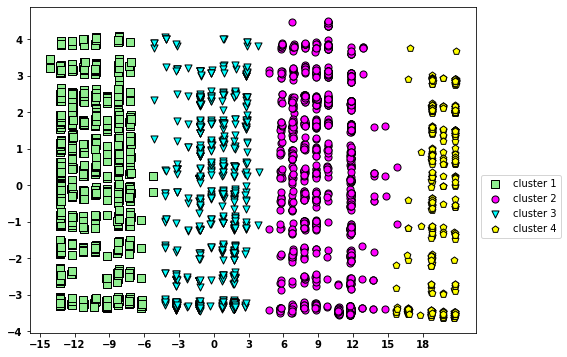

In [58]:
# print(data.shape)

#################  In agglorameartive we form grouping between the clusters there is no concept of centers 
km = AgglomerativeClustering(n_clusters=4)

y_km = km.fit_predict(data)


# create scatter plot for samples from each cluster

pca = PCA(n_components=2)
data = pca.fit_transform(data)
# print(data)
print(km.children_)
print(km.compute_full_tree)

plt.figure(figsize=(8,6))
plt.scatter(
    data[y_km == 0, 0], data[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)


plt.scatter(
    data[y_km == 1, 0], data[y_km == 1, 1],
    s=50, c='magenta',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    data[y_km == 2, 0], data[y_km == 2, 1],
    s=50, c='cyan',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    data[y_km == 3, 0], data[y_km == 3, 1],
    s=50, c='yellow',
    marker='p', edgecolor='black',
    label='cluster 4'
)

# plt.scatter(
#     data[y_km == 3, 0], data[y_km == 3, 1],
#     s=50, c='purple',
#     marker='o', edgecolor='black',
#     label='cluster 5'
# )

# plt.scatter(
#     data[y_km == 3, 0], data[y_km == 3, 1],
#     s=50, c='cyan',
#     marker='o', edgecolor='black',
#     label='cluster 6'
# )

# plt.scatter(
#     data[y_km == 3, 0], data[y_km == 3, 1],
#     s=50, c='red',
#     marker='o', edgecolor='black',
#     label='cluster 7'
# )

# # plot the centroids
# plt.scatter(
#     km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
#     s=300, marker='*',
#     c='red', edgecolor='black',
#     label='centroids'
# )





plt.legend(loc='best', bbox_to_anchor=(1, 0.5),scatterpoints=1)
# 
plt.xticks([x for x in range(-15,21,3)],weight='bold')
plt.yticks(weight='bold')
# plt.grid()
plt.show()


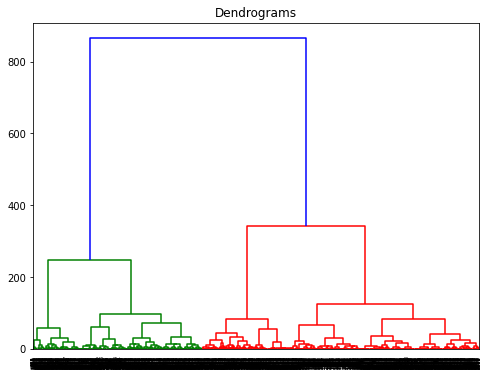

In [59]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(8,6))
plt.title("Dendrograms")  
dendrogram = sch.dendrogram(sch.linkage(data, method='ward'))
